<a href="https://colab.research.google.com/github/pjcroxas/Remote-Sensing/blob/main/02_Spatial_Vector_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lesson 1: Fundamental of Vector Data in Python
Vector data are composed of discrete geometric locations (x, y values) known as vertices that define the “shape” of the spatial object. The organization of the vertices determines the type of vector that you are working with. There are three types of vector data:

1. Points: Each individual point is defined by a single x, y coordinate. There can be many points in a vector point file. Examples of point data include: sampling locations, the location of individual trees or the location of plots.

2. Lines: Lines are composed of many (at least 2) vertices, or points, that are connected. For instance, a road or a stream may be represented by a line. This line is composed of a series of segments, each “bend” in the road or stream represents a vertex that has defined x, y location.

3. Polygons: A polygon consists of 3 or more vertices that are connected and “closed”. Thus the outlines of plot boundaries, lakes, oceans, and states or countries are often represented by polygons. Occasionally, a polygon can have a hole in the middle of it (like a doughnut), this is something to be aware of but not an issue you will deal with in this tutorial.

### I. Get Data using Earthpy Library

In [ ]:
# Install Libraries
!pip install earthpy
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 5.0 MB/s 
     |████████████████████████████████| 1.0 MB 46.3 MB/s 
     |████████████████████████████████| 19.3 MB 7.1 MB/s 
     |████████████████████████████████| 16.7 MB 35.6 MB/s 
     |████████████████████████████████| 6.3 MB 33.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import packages
import os
import matplotlib.pyplot as plt
import geopandas as gpd
import earthpy as et

# Get data and set working directory
data = et.data.get_data('spatial-vector-lidar')
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

Extracted output to /root/earth-analytics/data/spatial-vector-lidar/.


### II. File Import using Geopandas

In [ ]:
# Define path to file
plot_centroid_path = os.path.join("data", "spatial-vector-lidar",
                             "california", "neon-sjer-site",
                             "vector_data", "SJER_plot_centroids.shp")

# Import shapefile using gpd
sjer_plot_locations = gpd.read_file(plot_centroid_path)

**Spatial Data Attributes**
<hr>

Each object in a shapefile has one or more attributes associated with it. Shapefile attributes are similar to fields or columns in a spreadsheet. Each row in the spreadsheet has a set of columns associated with it that describe the row element. In the case of a shapefile, each row represents a spatial object - for example, a road, represented as a line in a line shapefile, will have one “row” of attributes associated with it. These attributes can include different types of information that describe objects stored within a shapefile. Thus, our road, may have a name, length, number of lanes, speed limit, type of road and other attributes stored with it.

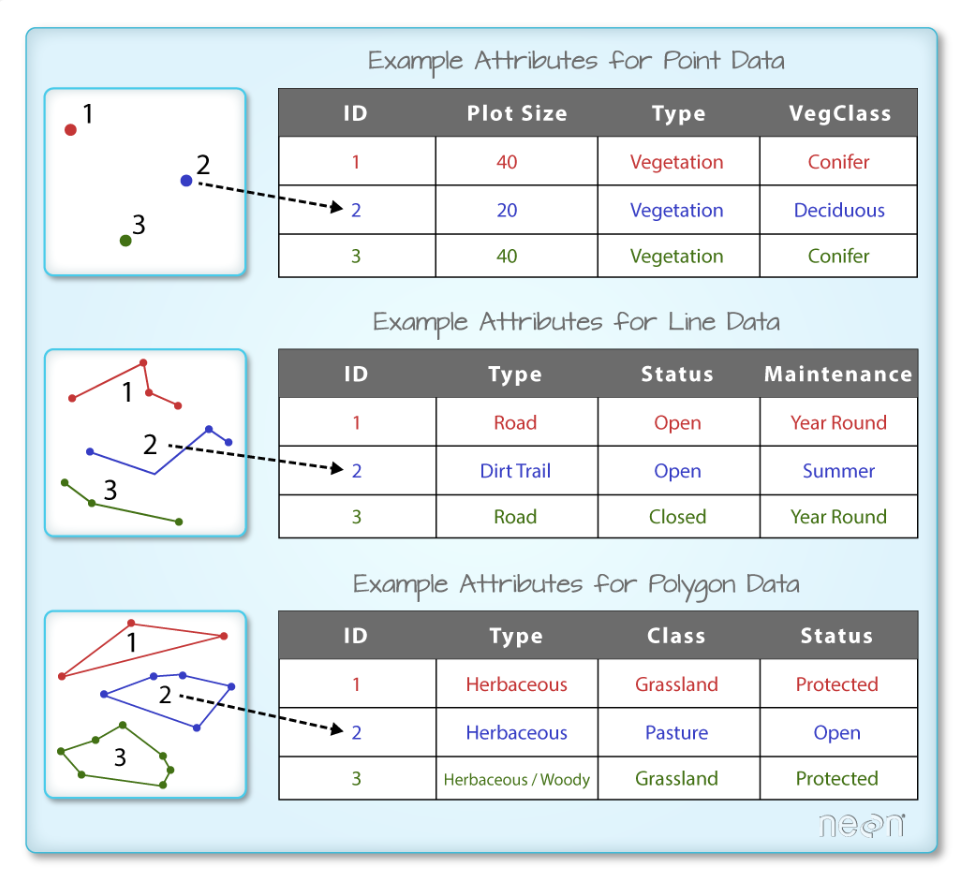

In [ ]:
# View top 6 rows of attribute table
sjer_plot_locations.head()

,Plot_ID,Point,northing,easting,plot_type,geometry
0,SJER1068,center,4111567.818,255852.376,trees,POINT (255852.376 4111567.818)
1,SJER112,center,4111298.971,257406.967,trees,POINT (257406.967 4111298.971)
2,SJER116,center,4110819.876,256838.760,grass,POINT (256838.760 4110819.876)
3,SJER117,center,4108752.026,256176.947,trees,POINT (256176.947 4108752.026)
4,SJER120,center,4110476.079,255968.372,grass,POINT (255968.372 4110476.079)


### III. View Metadata

Metadata of the vector data can be access from geopandas attributes

In [ ]:
# View the geometry type of each row
sjer_plot_locations.geom_type

0     Point
1     Point
2     Point
3     Point
4     Point
5     Point
6     Point
7     Point
8     Point
9     Point
10    Point
11    Point
12    Point
13    Point
14    Point
15    Point
16    Point
17    Point
dtype: object

The vector data has 17 rows, Point Geometry Type.

In [ ]:
# View object type
print("DATA TYPE:   ", type(sjer_plot_locations))

# View CRS of object
print("CRS:         ", sjer_plot_locations.crs)

# View the spatial extent
print("BOUNDS:      ", sjer_plot_locations.total_bounds)

# View shape
print("SHAPE:       ", sjer_plot_locations.shape)

DATA TYPE:    <class 'geopandas.geodataframe.GeoDataFrame'>
CRS:          epsg:32611
BOUNDS:       [ 254738.618 4107527.074  258497.102 4112167.778]
SHAPE:        (18, 6)


### IV. Visualize using `plot()` attribute

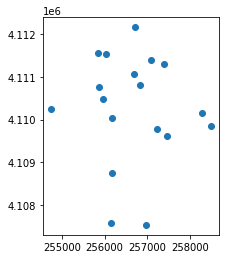

In [ ]:
sjer_plot_locations.plot()

#### IV-I. Plot in an axis

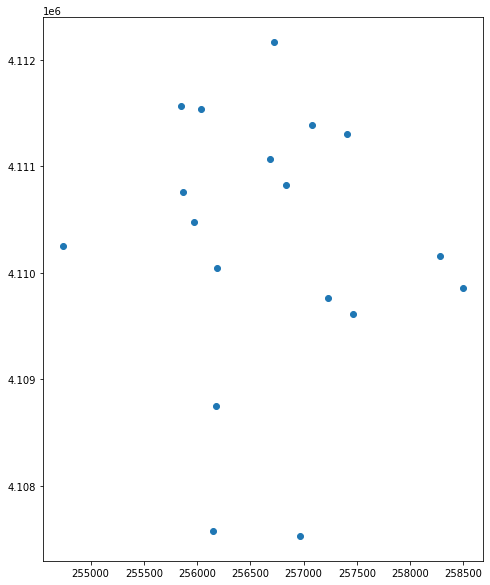

In [ ]:
# Plot in an axis
f, ax = plt.subplots(figsize=(10,10))
sjer_plot_locations.plot(ax=ax)
plt.show()

#### IV-II. Custom Viz

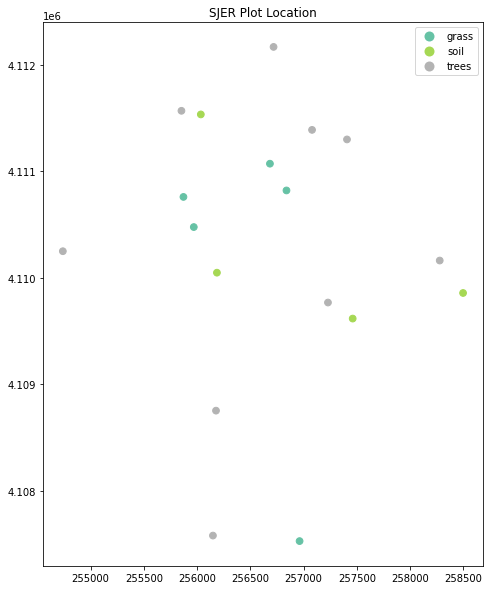

In [ ]:
# Custom visualization

fig, ax = plt.subplots(figsize=(10,10))

sjer_plot_locations.plot(column="plot_type",
                         categorical=True,
                         legend=True,
                         figsize=(10,6),
                         markersize=45,
                         cmap="Set2",
                         ax=ax)

ax.set_title("SJER Plot Location")
plt.show()

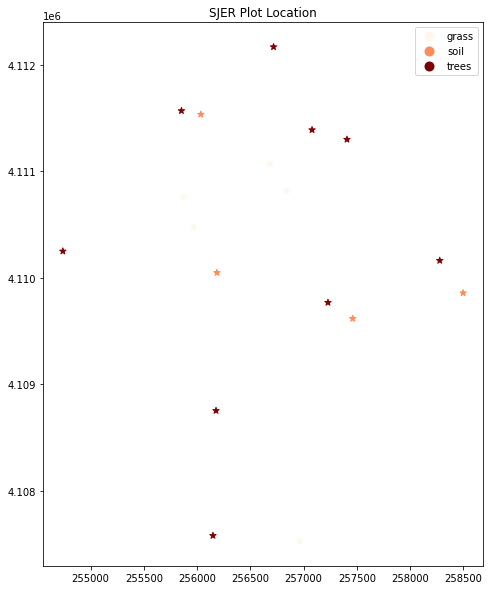

In [ ]:
# Change Plot Colors & Symbols

fig, ax = plt.subplots(figsize=(10,10))

sjer_plot_locations.plot(column="plot_type",
                         categorical=True,
                         legend=True,
                         figsize=(10,6),
                         marker="*",
                         markersize=45,
                         cmap="OrRd",
                         ax=ax)

ax.set_title("SJER Plot Location")
plt.show()

### V. Plot Multiple Shapefiles

In [ ]:
# Define path to crop boundary
sjer_crop_extent_path = os.path.join("data", "spatial-vector-lidar",
                                     "california", "neon-sjer-site",
                                     "vector_data", "SJER_crop.shp")

# Import to gpd
sjer_plot_crop = gpd.read_file(sjer_crop_extent_path)

In [ ]:
# Overview crop shape data
sjer_plot_crop.geom_type

0    Polygon
dtype: object

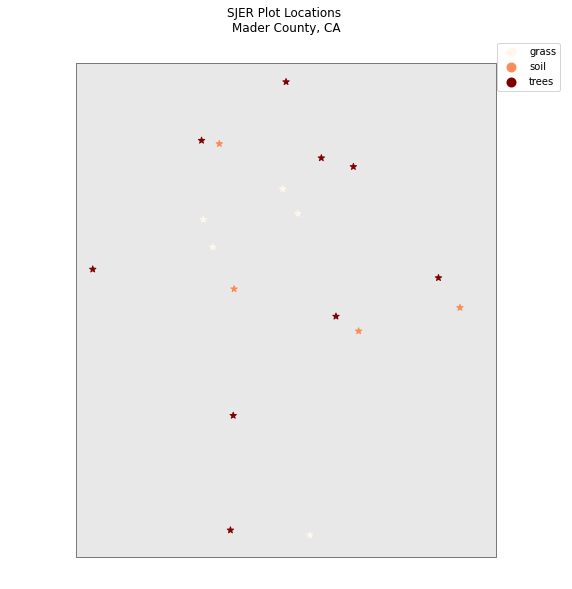

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))


# Crop Boundary/ Polygon
sjer_plot_crop.plot(color="lightgrey",
               edgecolor="black",
               alpha=.5,
               ax=ax)

# Crop Points
sjer_plot_locations.plot(column="plot_type",
                         categorical=True,
                         legend=True,
                         figsize=(10,6),
                         marker="*",
                         markersize=45,
                         cmap="OrRd",
                         ax=ax)

ax.set_title("SJER Plot Locations \nMader County, CA")
ax.set_axis_off()
plt.axis('equal')
plt.show()

##  Lesson 2: Coordinate Reference System

A coordinate reference system (CRS) is a coordinate-based local, regional or global system used to locate geographical entities

### The Component of a CRS <hr>

- <b>Coordinate System</b>: the X, Y grid upon which your data is overlayed and how you define where a point is located in space.
- <b>Horizontal and vertical units</b>: The units used to define the grid along the x, y (and z) axis.
- <b>Datum</b>: A modeled version of the shape of the earth which defines the origin used to place the coordinate system in space. You will explain this further, below.
- <b>Projection Information</b>: the mathematical equation used to flatten objects that are on a round surface (e.g. the earth) so you can view them on a flat surface (e.g. your computer screens or a paper map).

### I. Get Data using `earthpy` Library

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import earthpy as et

# Adjust plot font sizes
sns.set(font_scale=1.5)
sns.set_style("white")

# Set working dir & get data
data = et.data.get_data('spatial-vector-lidar')
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

Extracted output to /root/earth-analytics/data/spatial-vector-lidar/.


### II. File Import using Geopandas

In [ ]:
worldBound_path = os.path.join("data", "spatial-vector-lidar", "global",
                               "ne_110m_land", "ne_110m_land.shp")

worldBound = gpd.read_file(worldBound_path)

In [ ]:
# Geometry type
print("Geometry type: ", worldBound.geom_type)

Geometry type:  0      Polygon
1      Polygon
2      Polygon
3      Polygon
4      Polygon
        ...   
122    Polygon
123    Polygon
124    Polygon
125    Polygon
126    Polygon
Length: 127, dtype: object


Notice that this vector data is a polygon with 126 features

### III. Visualize Shape file using Matplotlib

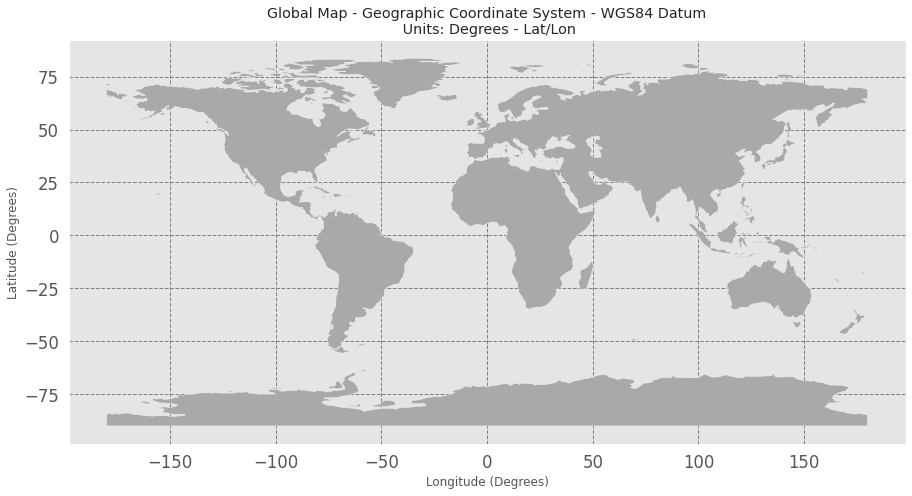

In [ ]:
# Plot worldBound data
from  matplotlib import style
style.use("ggplot")
fig, ax = plt.subplots(figsize=(15,8))
worldBound.plot(color="darkgrey",
                ax=ax)

# Set the x and y axis labels
ax.set(xlabel="Longitude (Degrees)",
       ylabel="Latitude (Degrees)",
       title="Global Map - Geographic Coordinate System - WGS84 Datum\n Units: Degrees - Lat/Lon")

# Add the x y graticules
ax.set_axisbelow(True)
ax.yaxis.grid(color="gray",
              linestyle="dashed")

ax.xaxis.grid(color="gray",
              linestyle="dashed")

plt.show()


####  III-I. Create spatial Point Object

In [ ]:
add_points = np.array([[-105.2519, 40.0274],
                       [10.75, 59.85],
                       [2.9833, 39.61667]])

city_locations = [Point(xy) for xy in add_points]
city_locations

In [ ]:
city_locations = gpd.GeoDataFrame(city_locations,
                               columns=['geometry'],
                               crs=worldBound.crs)

city_locations

,geometry
0,POINT (-105.25190 40.02740)
1,POINT (10.75000 59.85000)
2,POINT (2.98330 39.61667)


#### III-II. Plot the Data points with the worldBound data

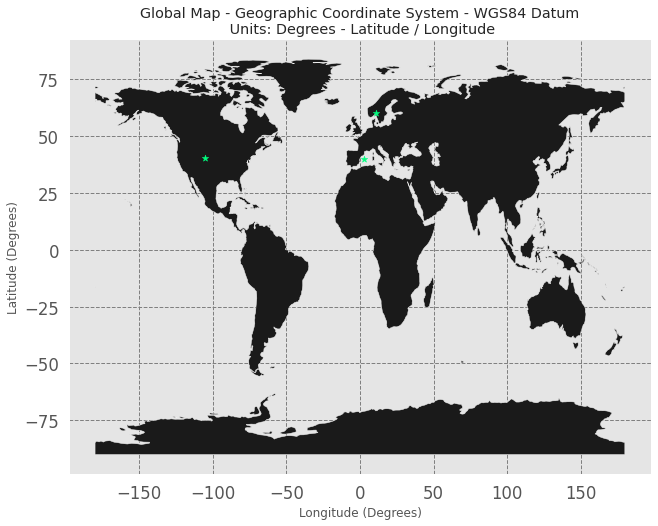

In [ ]:
# Plot point locations
fig, ax = plt.subplots(figsize=(15, 8))

worldBound.plot(figsize=(15, 8), color='k',
               ax=ax)
# Add city locations
city_locations.plot(ax=ax,
                    color='springgreen',
                    marker='*',
                    markersize=45)

# Setup x y axes with labels and add graticules
ax.set(xlabel="Longitude (Degrees)", ylabel="Latitude (Degrees)",
       title="Global Map - Geographic Coordinate System - WGS84 Datum\n Units: Degrees - Latitude / Longitude")
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')
ax.xaxis.grid(color='gray', linestyle='dashed')

### IV. Include the graticules
<b>Graticule</b> - a network of lines representing meridians and parallels, on which a map or plan can be represented.

[Text(224.04207524987874, 0.5, 'Y Coordinates (meters)'),
 Text(0.5, 40.5, 'X Coordinates (meters)'),
 Text(0.5, 1.0, 'World Map - Geographic Coordinate Reference System (long/lat degrees)')]

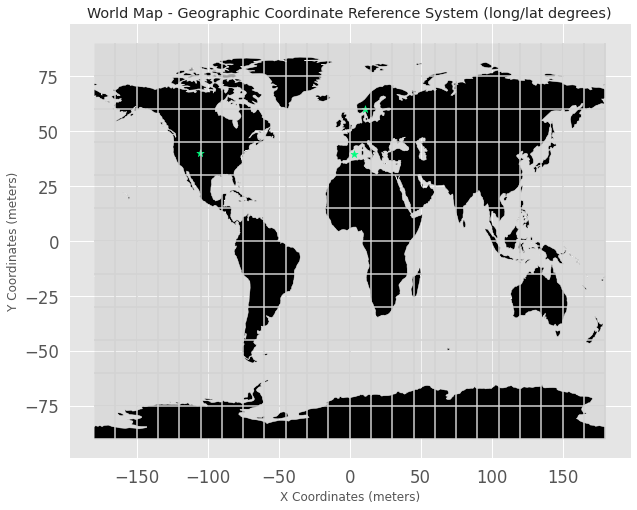

In [ ]:
# Import graticule & world bounding box shapefile data
graticule_path = os.path.join("data", "spatial-vector-lidar", "global",
                              "ne_110m_graticules_all", "ne_110m_graticules_15.shp")

graticule = gpd.read_file(graticule_path)

# Import Spatial Extent
bbox_path = os.path.join("data", "spatial-vector-lidar", "global",
                          "ne_110m_graticules_all", "ne_110m_wgs84_bounding_box.shp")

bbox = gpd.read_file(bbox_path)

# Create map axis object
fig, ax = plt.subplots(1,1, figsize=(15,8))

# Add bounding box and graticule layers
# Plot = bounding box + graticule + worldbound

bbox.plot(ax=ax, alpha=.1, color="grey")
graticule.plot(ax=ax, color="lightgrey")
worldBound.plot(ax=ax, color="black")

# Add points to plot
city_locations.plot(ax=ax,
                    markersize=60,
                    color="springgreen",
                    marker="*")

# Add title and axes labels
ax.set(title="World Map - Geographic Coordinate Reference System (long/lat degrees)",
       xlabel="X Coordinates (meters)",
       ylabel="Y Coordinates (meters)")

### V. Reprojection: CRS-Robinson
<hr>
You can view the same data above, in another CRS - Robinson. Robinson is a projected CRS. Notice that the country boundaries on the map - have a different shape compared to the map that you created above in the CRS: <b>Geographic lat/long WGS84</b>.

Below you first reproject your data into the robinson projects (+proj=robin). Then you plot the data once again.

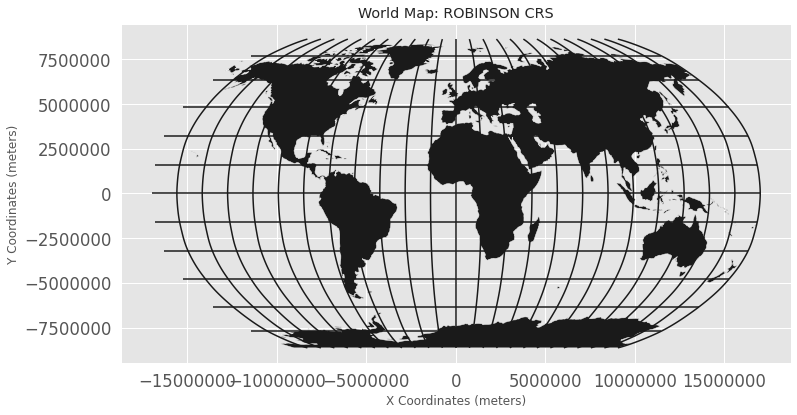

In [ ]:
# Reproject the data
worldBound_robin = worldBound.to_crs('+proj=robin')
graticule_robin = graticule.to_crs('+proj=robin')

# Plot the data
fig, ax = plt.subplots(figsize=(12,8))

worldBound_robin.plot(ax=ax,
                color='k')
graticule_robin.plot(ax=ax,
                      color='k')

ax.set(title="World Map: ROBINSON CRS",
       xlabel="X Coordinates (meters)",
       ylabel="Y Coordinates (meters)")

for axis in [ax.xaxis, ax.yaxis]:
  formatter = ScalarFormatter()
  formatter.set_scientific(False)
  axis.set_major_formatter(formatter)

<small> Reprojecting the worldbound + graticule without the location points.

What happens if you add the same Lat / Long coordinate locations that you used above, to your map? Remember that the data on your map are in the `CRS` - `Robinson`.

(-18706415.123721145, 18706406.403681763, -9487670.13161, 9487670.131610002)

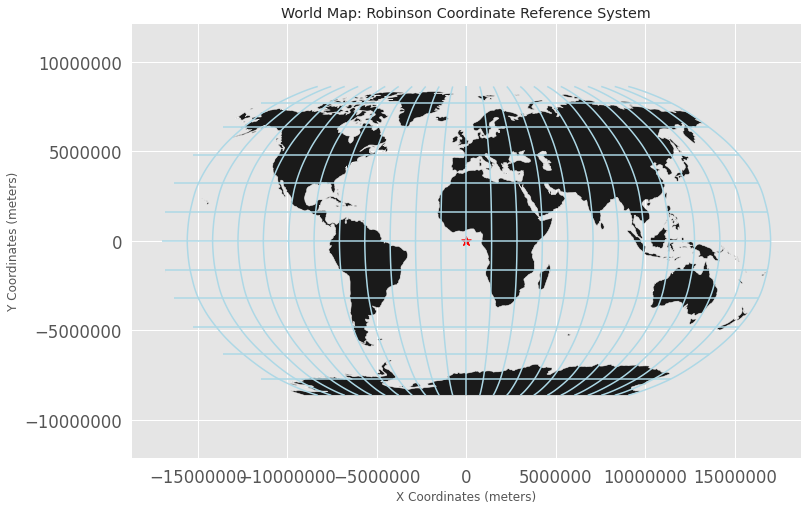

In [ ]:
# Reproject the data
worldBound_robin = worldBound.to_crs('+proj=robin')
graticule_robin = graticule.to_crs('+proj=robin')

# Plot the data
fig, ax = plt.subplots(figsize=(12,8))

worldBound_robin.plot(ax=ax,
                color='k')
graticule_robin.plot(ax=ax,
                      color='lightblue')

# Add points to plot
city_locations.plot(ax=ax,
                    markersize=100,
                    color="red",
                    marker="*")

ax.set(title="World Map: Robinson Coordinate Reference System",
       xlabel="X Coordinates (meters)",
       ylabel="Y Coordinates (meters)")

for axis in [ax.xaxis, ax.yaxis]:
  formatter = ScalarFormatter()
  formatter.set_scientific(False)
  axis.set_major_formatter(formatter)

plt.axis('equal')

Notice above that when you try to add lat/long coordinates in degrees, to a map in a different CRS, the points are not in the correct location. You need to first convert the points to the same CRS that your other data are in. The process of converting a dataset from one CRS to another is often referred to as <b>reprojection</b>.

In python, you use the `.to_crs` method to reproject your data.

(-18491143.688634027, 18491143.68863404, -9473562.580980353, 9191411.56838741)

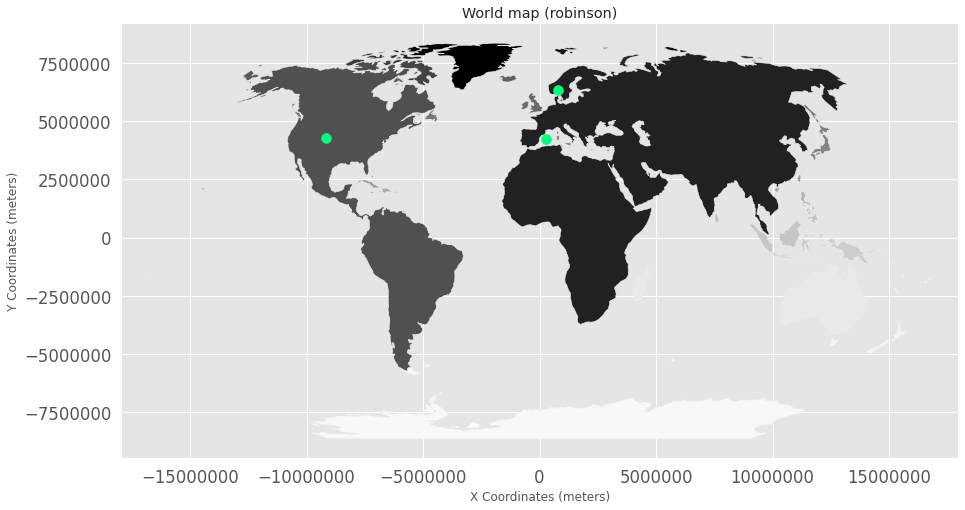

In [ ]:
# Reproject point locations to the Robinson projection
city_locations_robin = city_locations.to_crs(worldBound_robin.crs)

fig, ax = plt.subplots(1,1, figsize=(15,8))
worldBound_robin.plot(ax=ax,
                      cmap="Greys")
ax.set(title="World map (robinson)",
       xlabel="X Coordinates (meters)",
       ylabel="Y Coordinates (meters)")
city_locations_robin.plot(ax=ax,
                          markersize=100,
                          color='springgreen')
for axis in [ax.xaxis, ax.yaxis]:
    formatter = ScalarFormatter()
    formatter.set_scientific(False)
    axis.set_major_formatter(formatter)
plt.axis('equal')

### VII Compare Maps
Both of the plots above look visually different and also use a different coordinate system. Look at both, side by side, with the actual <b>graticules</b> or latitude and longitude lines rendered on the map.

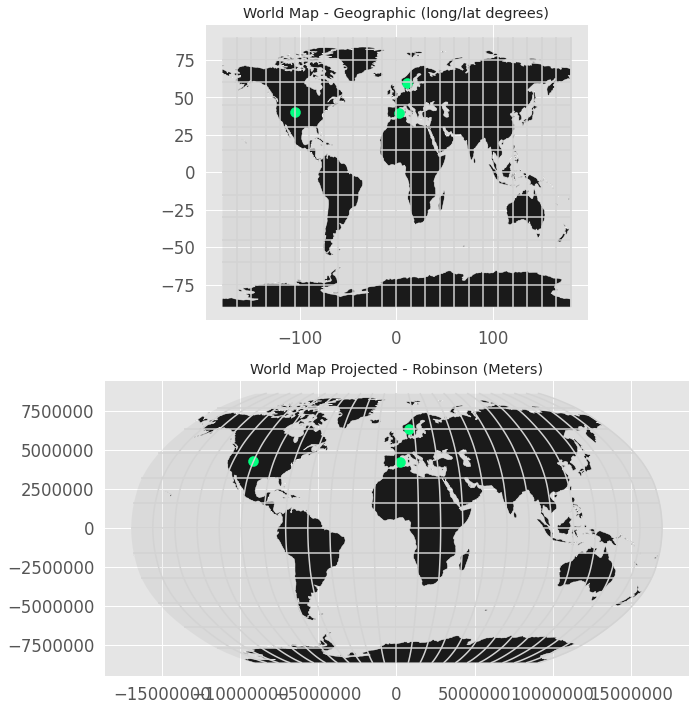

In [ ]:
# Reproject graticules and bounding box  to robinson
graticule_robinson = graticule.to_crs('+proj=robin')
bbox_robinson = bbox.to_crs('+proj=robin')

# Setup plot with 2 "rows" one for each map and one column
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(13, 12))

# First plot
bbox.plot(ax=ax0,
          alpha=.1,
          color='grey')

graticule.plot(ax=ax0,
               color='lightgrey')

worldBound.plot(ax=ax0,
                color='k')

city_locations.plot(ax=ax0,
                    markersize=100,
                    color='springgreen')

ax0.set(title="World Map - Geographic (long/lat degrees)")

# Second plot
bbox_robinson.plot(ax=ax1,
                   alpha=.1,
                   color='grey')

graticule_robinson.plot(ax=ax1,
                        color='lightgrey')

worldBound_robin.plot(ax=ax1,
                      color='k')

city_locations_robin.plot(ax=ax1,
                          markersize=100,
                          color='springgreen')

ax1.set(title="World Map Projected - Robinson (Meters)")

for axis in [ax1.xaxis, ax1.yaxis]:
    formatter = ScalarFormatter()
    formatter.set_scientific(False)
    axis.set_major_formatter(formatter)

# Lesson 3: Geographic vs. Projected CRS
<hr>

The above maps provide examples of the two main types of coordinate systems:

1. <b>Geographic coordinate systems:</b> coordinate systems that `span the entire globe` (e.g. latitude / longitude).

2. <b>Projected coordinate Systems:</b> coordinate systems that are `localized` to minimize visual distortion in a particular region `(e.g. Robinson, UTM, State Plane)`

As you discussed in the previous lesson, each CRS is optimized to best represent the:

- shape and/or
- scale / distance and/or
- area

of features in a dataset. There is not a single CRS that does a great job at optimizing all three elements: shape, distance AND area. Some CRSs are optimized for shape, some are optimized for distance and some are optimized for area. Some CRSs are also optimized for particular regions - for instance the United States, or Europe.

#### I. The Structure of Geographic CRS
<hr>

A geographic CRS uses a grid that wraps around the entire globe. This means that each point on the globe is defined using the SAME coordinate system and the same units as defined within that particular geographic CRS. Geographic coordinate reference systems are best for global analysis however it is important to remember that distance is distorted using a geographic lat / long `crs`.

In [ ]:
import os
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import geopandas as gpd
from shapely.geometry import Point
import earthpy as et
import seaborn as sns

# Adjust plot font sizes
sns.set(font_scale=1.5)
sns.set_style("white")

# Set working dir & get data
data = et.data.get_data('spatial-vector-lidar')
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

**Spatial Projection** refers to the mathematical calculations performed to flatten the 3D data onto a 2D plane (your computer screen or a paper map). Projecting data from a round surface onto a flat surface, results in visual modifications to the data when plotted on a map. Some areas are stretched and some are compressed. You can see this distortion when you look at a map of the entire globe.

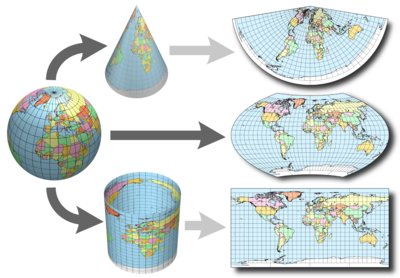

<B>Understand UTM Coordinates</B>
<hr>
Compare coordinates for one location, but saved in two different CRSs to better understand what this looks like. The coordinates for Boulder, Colorado in UTM are:

`UTM Zone 13N easting: 476,911.31m, northing: 4,429,455.3`



In [ ]:
boulder_df = np.array([[476911.31,  4429455.35]])
geometry = [Point(xy) for xy in boulder_df]

boulder_loc = gpd.GeoDataFrame(geometry,
                               columns=['geometry'],
                               crs={'init':'epsg:2957'})

boulder_loc

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,geometry
0,POINT (476911.310 4429455.350)


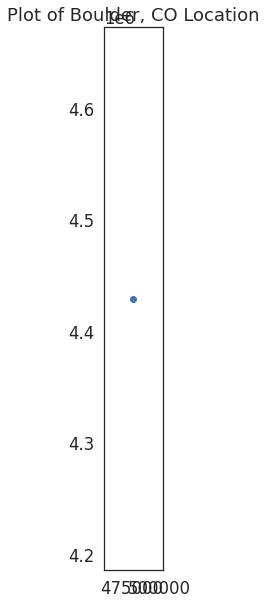

In [ ]:
## Plot the coords
fig, ax = plt.subplots(figsize=(10,10))
boulder_loc.plot(ax=ax)
ax.set_title("Plot of Boulder, CO Location")

# Turn off scientific notation
plt.ticklabel_format(useOffset=False)
plt.show()

In [ ]:
# View CRS
print("CRS: ", boulder_loc.crs)
print("Point: ", boulder_loc)

print("=============================================")
# Reproject the data to WGS84
boulder_df_geog = boulder_loc.to_crs(epsg=4326)
print("CRS WGS84: ", boulder_df_geog.crs)

# View new coordinate
print("New point: ", boulder_df_geog)

CRS:  +init=epsg:2957 +type=crs
Point:                           geometry
0  POINT (476911.310 4429455.350)
CRS WGS84:  epsg:4326
New point:                        geometry
0  POINT (-105.27056 40.01499)


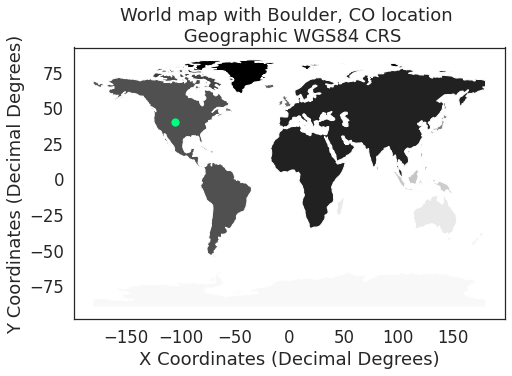

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

worldBound.plot(cmap='Greys',
                ax=ax)

ax.set(title="World map with Boulder, CO location \n Geographic WGS84 CRS",
       xlabel="X Coordinates (Decimal Degrees)",
       ylabel="Y Coordinates (Decimal Degrees)")

boulder_df_geog.plot(ax=ax,
                     markersize=52,
                     color='springgreen')
plt.show()

#### VIII. Datum</b>
<hr>
The datum describes the vertical and horizontal reference point of the coordinate system. The vertical datum describes the relationship between a specific ellipsoid (the top of the earth’s surface) and the center of the earth. The datum also describes the origin (0,0) of a coordinate system.

Frequently encountered datums:

- WGS84 – World Geodetic System (created in) 1984. The origin is the center of the earth.

- NAD27 & NAD83 – North American Datum 1927 and 1983, respectively. The origin for NAD 27 is Meades Ranch in Kansas.

- ED50 – European Datum 1950


# Lesson 4. CRS: Understand EPSG, WKT and Other  CRS Definition Style
<hr>
<b>Coordinate Reference System Formats</b>
Three common formats include:

- <b>proj.4</b>
- <b>EPSG</b>
- Well known Text (<b>WKT</b>) formats.

Often you have CRS information in one format and you need to translate that CRS into a different format to use in a tool like `Python`. Thus it is good to be familiar with some of the key formats that you are likely to encounter.

<b>PROJ or PROJ.4 strings</b>
PROJ.4 strings are a compact way to identify a spatial or coordinate reference system. PROJ.4 strings are one of the formats that Geopandas can accept. However, note that many libraries are moving towards the more concise EPSG format.

Using the PROJ.4 syntax, you specify the complete set of parameters including the ellipse, datum, projection units and projection definition that define a particular `CRS`.

<b>Break down the proj.4 format</b>

Below is an example of a proj.4 string:

`+proj=utm +zone=11 +datum=WGS84 +units=m +no_defs +ellps=WGS84 +towgs84=0,0,0`

Notice that the `crs` information is structured using a string of characters and numbers that are combined using `+` signs. The `CRS` for your data are in the `proj4` format. The string contains all of the individual CRS elements that `Python` or another `GIS` might need. Each element is specified with a `+` sign, similar to how a `.csv` file is delimited or broken up by a `,.` After each `+` we see the CRS element being defined. For example `+proj=` and `+datum=`.

You can break down the `proj4` string into its individual components (again, separated by + signs) as follows:

- <b>+proj=utm:</b> the projection is UTM, UTM has several zones.
- <b>+zone=11:</b> the zone is 11 which is a zone on the west coast, USA.
- <b>datum=WGS84:</b> the datum WGS84 (the datum refers to the 0,0 reference for the coordinate system used in the projection)
- <b>+units=m:</b> the units for the coordinates are in METERS.
- <b>+ellps=WGS84:</b> the ellipsoid (how the earth’s roundness is calculated) for the data is WGS84

Note that the `zone` is unique to the UTM projection. Not all `CRS` will have a zone.

Also note that while California is above the equator - in the northern hemisphere - there is no N (specifying north) following the zone (i.e. 11N) South is explicitly specified in the UTM proj4 specification however if there is no S, then you can assume it’s a northern projection.

<b>EPSG Codes </b>

The `EPSG` codes are 4-5 digit numbers that represent CRSs definitions. The acronym `EPSG`, comes from the, now defunct, European Petroleum Survey Group. Each code is a four-five digit number which represents a particular `CRS` definition.

In [ ]:
# Import the worldBoundary layer

import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import earthpy as et

# Set working dir & get data
data = et.data.get_data('spatial-vector-lidar')
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

In [ ]:
# Import world boundary shapefile
worldBound_path = os.path.join("data", "spatial-vector-lidar", "global",
                               "ne_110m_land", "ne_110m_land.shp")
worldBound = gpd.read_file(worldBound_path)

worldBound.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Notice that the CRS returned above, consists of two parts:

1. ‘init’ which tells python that a CRS definition (ie EPSG code) will be provided and
2. the epsg code itself epsg: 4326

In [ ]:
# Create a CRS Object in Python
boulder_xy = np.array([[476911.31, 4429455.35]])

# Create shapelt point object
boulder_xy_pt = [Point(xy) for xy in boulder_xy]

# Convert to spatial dataframe - geodataframe -- assign the CRS using epsg code
boulder_loc = gpd.GeoDataFrame(boulder_xy_pt,
                               columns=['geometry'],
                               crs={'init':'epsg:2957'})

# View crs of new spatial points object
print("CRS: ", boulder_loc.crs)

CRS:  +init=epsg:2957 +type=crs


/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<b>WKT or Well-known Text</b>

It’s useful to recognize this format given many tools - including ESRI’s ArcMap and ENVI use this format. Well-known Text (`WKT`) is a for compact machine- and human-readable representation of geometric objects. It defines elements of coordinate reference system (`CRS`) definitions using a combination of brackets `[]` and elements separated by commas (`,`)

Here is an example of `WKT` for `WGS84` geographic:

`GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1984",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["Degree",0.017453292519943295]]`

Notice here that the elements are described explicitly using all caps - for example:

- UNIT
- DATUM

Sometimes WKT structured CRS information are embedded in a metadata file - similar to the structure seen below:

`GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0,
        AUTHORITY["EPSG","8901"]],
    UNIT["degree",0.01745329251994328,
        AUTHORITY["EPSG","9122"]],
    AUTHORITY["EPSG","4326"]]`